<a href="https://colab.research.google.com/github/Yilder02/SyS_2025-1/blob/main/Ejercicios_SyS/1_introduccion/3_Operaciones_de_se%C3%B1ales_continuas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operaciones b√°sicas sobre se√±ales

Las operaciones como la superposici√≥n, el cambio temporal y el escalamiento, se utilizan para construir se√±ales con una estructura m√°s compleja.

Se introduce un conjunto de operaciones elementales que se utilizan frecuentemente en el procesamiento de se√±ales.

### Superposici√≥n

La superposici√≥n $x(t)$ de dos se√±ales $x_1(t)$ and $x_2(t)$ est√° dada por:

\begin{equation}
x(t) = A \cdot x_1(t) + B \cdot x_2(t)
\end{equation}

con los pesos complejos $A, B \in \mathbb{C}$.

**Ejemplo**

El siguiente ejemplo ilustra la superposici√≥n de dos se√±ales arm√≥nicas $x(t) = A \cdot \cos(\omega_1 t) + B \cdot \cos(\omega_2 t)$ con pesos $A$, $B$ y frecuencia angular $\omega_1$ y $\omega_2$.

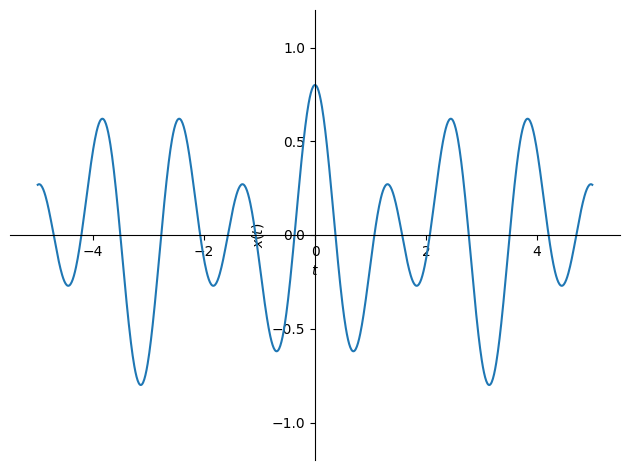

In [1]:
%matplotlib inline
import sympy as sym

t = sym.symbols('t', real=True)#se declara la variable simb√≥lica t

#par√°metros de las funciones cos
A = .3
om1 = 3
B = .5
om2 = 5

#operaci√≥n superposici√≥n en sympy
x = A*sym.cos(om1*t) + B*sym.cos(om2*t)
#se grafica la se√±al resultante
sym.plot(x, (t,-5,5), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');


### Desplazamiento temporal

El desplazamiento temporal de una se√±al $s(t)$ en un instante de tiempo $\tau$ es una operaci√≥n frecuentemente aplicada en el procesamiento de se√±ales. Por ejemplo, para modelar la propagaci√≥n de se√±ales desde un actuador a un sensor.

El desplazamiento de la se√±al $x(t)$ est√° definido como:

\begin{equation}
x(t) = s(t-\tau)
\end{equation}

con $\tau \in \mathbb{R}$. La se√±al $s(t)$ es:

* desplazada hacia la derecha (*retrasada*) para $\tau > 0$
* desplazada hacia la izquierda para $\tau < 0$

**Ejemplo**

Para ilustrar el cambio temporal de se√±ales, la construcci√≥n de una se√±al escalera por una superposici√≥n de desplazamiento se define como:

\begin{equation}
x(t) = \text{rect}\left(t - \frac{1}{2} \right) + \frac{2}{3} \cdot \text{rect}\left(t-\frac{3}{2} \right) + \frac{1}{3} \cdot \text{rect} \left(t-\frac{5}{2} \right)
\end{equation}



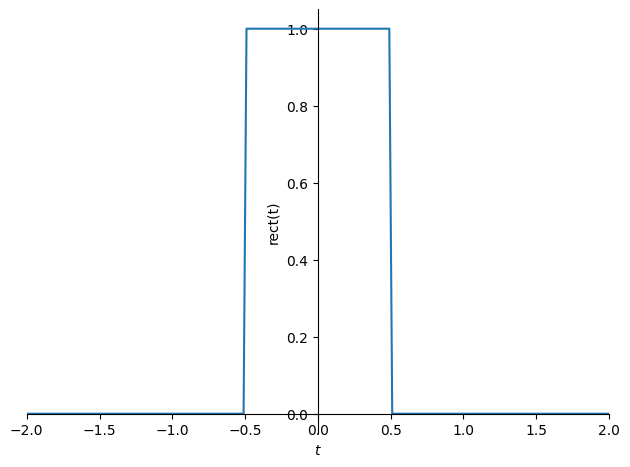

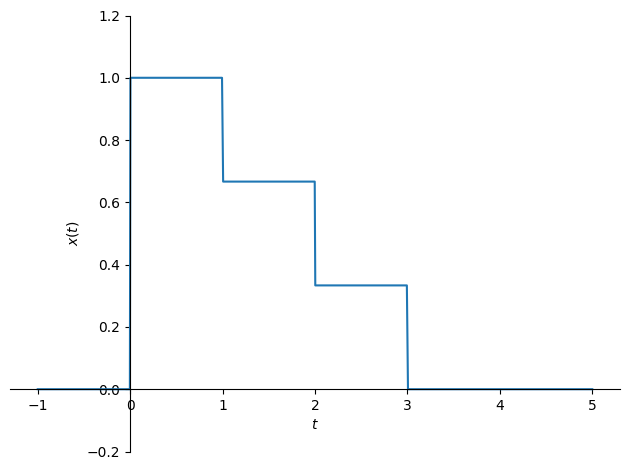

In [2]:
rect = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)
sym.plot(rect, xlim=[-2,2], ylabel = r'rect(t)')
#los rect desplazados se acoplan con escalamientos diferentes
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)
sym.plot(x, (t, -1, 5), ylim=[-0.2, 1.2], ylabel='$x(t)$');

**Ejercicio**

* Agregar otro escal√≥n al principio de la se√±al escalera modificando el ejemplo anterior.

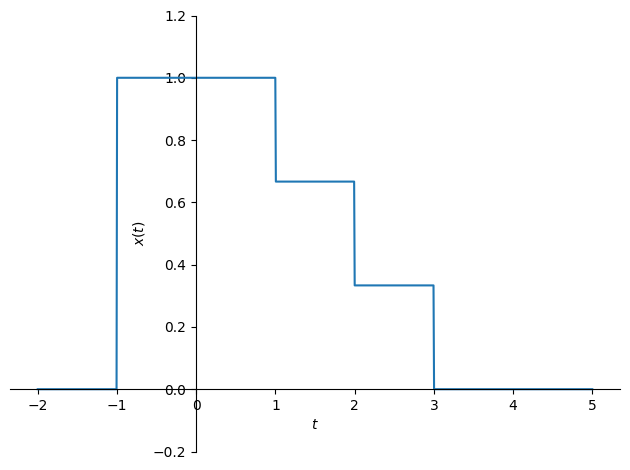

In [3]:
import sympy as sym
t = sym.symbols('t', real=True)

# Definici√≥n del pulso rectangular
rect = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)

#Se√±al escalera modificada con un nuevo escal√≥n al inicio(rect.subs(t, t + 1/2))
x = rect.subs(t, t + 1/2) + rect.subs(t, t - 1/2) + 2/3*rect.subs(t, t - 3/2) + 1/3*rect.subs(t, t - 5/2)

# Gr√°fica
sym.plot(x, (t, -2, 5), ylim=[-0.2, 1.2], ylabel='$x(t)$')


### Escalamiento temporal

El escalamiento temporal de una se√±al $s(t)$ est√° definido como:

\begin{equation}
x(t) = s(a \cdot t)
\end{equation}

con $a \in \mathbb{R}$. La se√±al $s(t)$ es

* estirada para $0 < a < 1$
* comprimida $a > 1$
* invertida y escalada para $a < 0$

Una aplicaci√≥n de escalado temporal en el procesamiento de la se√±al es la escala de las se√±ales est√°ndar y el modelado del [efecto Doppler](https://en.wikipedia.org/wiki/Doppler_effect).

**Ejemplo**

El siguiente ejemplo ilustra el escalamiento de una se√±al escalera $y(t) = x(a \cdot t)$.

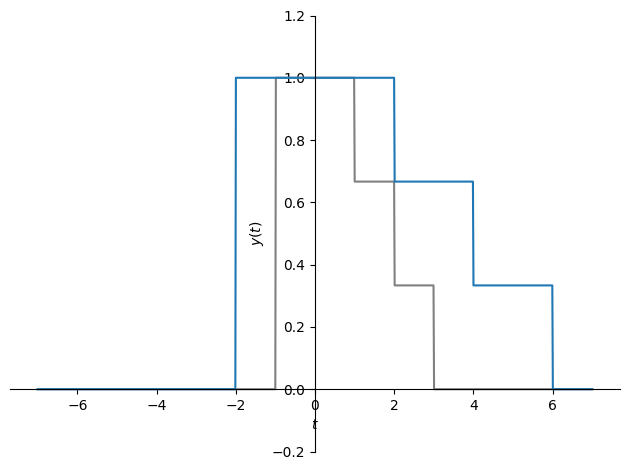

In [4]:
a = sym.symbols('a', real=True)
y = x.subs(t, a*t)

px = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='gray')
py = sym.plot(y.subs(a,1/2), (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)#se extiende los gr√°ficos sobre una misma figura
px.show()

**Ejercicio**

* Modifique el ejemplo anterior para que la se√±al se comprima.
* Modifique el ejemplo anterior para que la se√±al se escale y se invierta. ¬øQu√© factor de escala `a` da como resultado un       estiramiento/compresi√≥n en este contexto?  
* RESPUESTA:
- Si **a > 1**, la se√±al se comprime en el tiempo (se hace mas rapida).

- Si **a < 1**, la se√±al se estira en el tiempo (se hace mas lenta).

- Si **a < 0**, adem√°s de escalar, la se√±al se invierte horizontalmente (reflejo en el eje vertical), es decir, se reproduce hacia atr√°s en el tiempo..


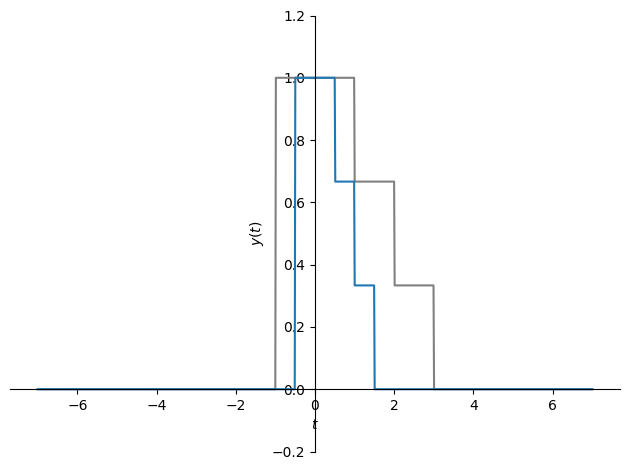

In [16]:
import sympy as sym
t, a = sym.symbols('t a', real=True)

# Definici√≥n del pulso rectangular
rect = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)
x = rect.subs(t, t + 1/2) + rect.subs(t, t - 1/2) + 2/3*rect.subs(t, t - 3/2) + 1/3*rect.subs(t, t - 5/2)

# Escalamiento general con s√≠mbolo
y = x.subs(t, a*t)
# ---------------------------------------------
#va = 1      # Sin cambio
#va = 0.5    # Estiramiento
#va = 2      # Compresi√≥n
#va = -2     # Inversi√≥n + Compresi√≥n
# ---------------------------------------------

# Gr√°fica original en gris
px = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='gray')

# Gr√°fica modificada con escalamiento
py = sym.plot(y.subs(a, va), (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)

# Superponer ambas
px.extend(py)
px.show()


### Desplazamiento Temporal

El desplazamiento temporal de una se√±al $s(t)$ est√° definido como

\begin{equation}
x(t) = s(\tau - t)
\end{equation}

para $\tau \in \mathbb{R}$. Como $s(\tau - t) = s(- (t - \tau))$ la operaci√≥n espejo tambi√©n se puede representar como una inversi√≥n temporal de la se√±al $s(t)$ seguida por un desplazamiento de $\tau$ de la se√±al invertida. Para $\tau = 0$ este resultado es solo una inversi√≥n temporal de la se√±al.

La operaci√≥n de cambio temporal puede interpretarse geom√©tricamente como un reflejo de la se√±al $s(t)$ en el eje vertical $t=\frac{\tau}{2}$.

**Ejemplo**

El siguiente ejemplo ilustra el cambio temporal $y(t) = x(\tau - t)$ de la se√±al escalera $x(t)$ anteriormente introducida.

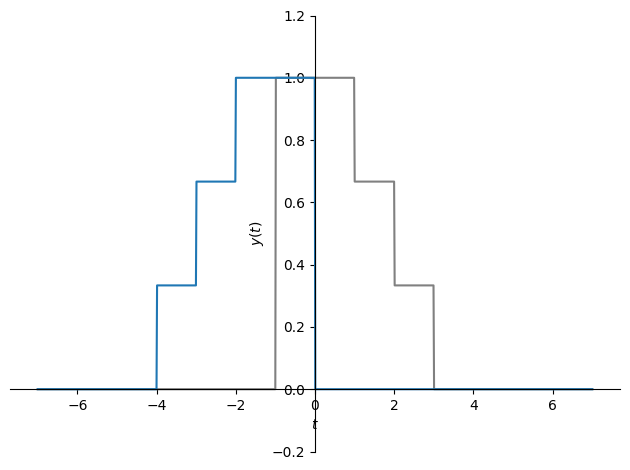

In [5]:
tau =-1
y = x.subs(t, tau - t)

px=sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', line_color='gray', show=False)
py=sym.plot(y, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()

**Ejercicio**

* Para que valor de $\tau$, ¬øla se√±al comienza en $t=0$?
* Realice un cambio temporal dividiendo en dos operaciones consecutivas: (i) Inversi√≥n temporal y (ii) Desplazamiento temporal.

### üìå Ejercicio ‚Äì Transformaci√≥n temporal de la se√±al

#### 1. ¬øPara qu√© valor de \$( \tau \) $ la se√±al comienza en  (t = 0)?

Queremos que la se√±al invertida comience exactamente en \( t = 0 \).  
La se√±al original \( x(t) \) termina en \( t = 2.5 \).  
Al invertirla, la se√±al comienza en \( t = -2.5 \).  
Para que esta se√±al invertida comience en \( t = 0 \), se requiere desplazarla hacia la derecha:

$$
\tau = 2.5
$$

---

#### 2. Cambio temporal en dos operaciones consecutivas:

**(i) Inversi√≥n temporal:**

$$
x(-t)
$$

**(ii) Desplazamiento temporal hacia la derecha:**

$$
x(-t + \tau) = x(\tau - t)
$$

Con \$( \tau = 2.5 \)$, la se√±al invertida queda alineada para comenzar en \( t = 0 \).


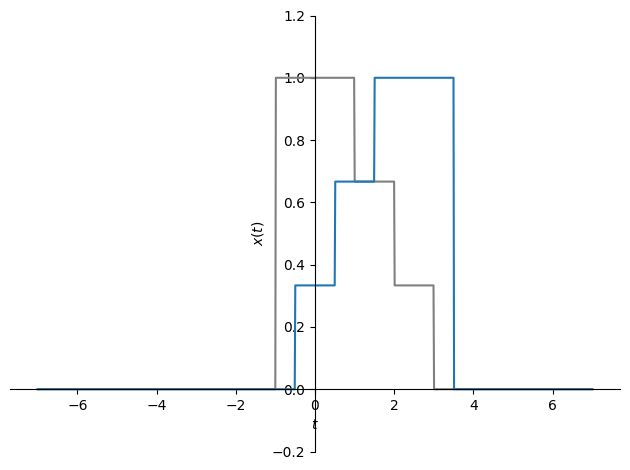

In [19]:
import sympy as sym

t = sym.symbols('t', real=True)

# Se√±al original tipo escalera
rect = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)
x = rect.subs(t, t + 1/2) + rect.subs(t, t - 1/2) + 2/3*rect.subs(t, t - 3/2) + 1/3*rect.subs(t, t - 5/2)

# Paso 1: inversi√≥n
x_inv = x.subs(t, -t)

# Paso 2: desplazamiento con tau = 2.5
tau = 2.5
y = x_inv.subs(t, t - tau)

# Gr√°fica
px = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$x(t)$', line_color='gray', show=False)
py = sym.plot(y, (t, -7, 7), ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()


**Copyright**

The notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Signals and Systems* by Sascha Spors.